COLETA DE DADOS

In [ ]:
import openpyxl
from bs4 import BeautifulSoup
import requests

In [ ]:
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; MAARJS; rv:11.0) like Gecko',
    'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Encoding':'gzip,deflate,sdch',
    'Accept-Language':'pt-BR; q=0.9;en-US,en;q=0.8',
    'Connection':'Keep-alive',
    'Referer':'https://www.google.com.br',
}

resposta = requests.get("https://www.amazon.com.br/s?k=pc&__mk_pt_BR=ÅMÅŽÕÑ&crid=1QFK2NDX8YSHD&sprefix=pc%2Caps%2C212&ref=nb_sb_noss_1", headers = HEADERS)
resposta.text

soup = BeautifulSoup(resposta.text, 'html.parser')
soup
info = soup.find_all(class_="a-size-base-plus a-color-base a-text-normal")
prod = soup.find_all(class_= "a-price-whole")

produtos = []
prod2 = []

for i in info:
  produtos.append(i.text)

for j in prod:
  prod2.append(j.text)
  
produtos
prod2


['1.299,',
 '1.299,',
 '950,',
 '2.240,',
 '1.190,',
 '915,',
 '3.269,',
 '1.678,',
 '915,',
 '1.399,',
 '3.299,',
 '1.083,',
 '922,',
 '2.275,',
 '1.875,',
 '1.758,',
 '1.467,',
 '880,',
 '1.006,',
 '1.570,',
 '2.305,',
 '53,',
 '185,',
 '393,',
 '2.586,',
 '1.330,',
 '5.199,',
 '3.749,',
 '2.099,',
 '2.039,',
 '1.899,',
 '3.099,',
 '2.380,',
 '4.933,',
 '1.164,',
 '2.716,',
 '2.499,',
 '1.000,',
 '1.330,',
 '2.539,',
 '2.295,',
 '2.332,',
 '3.130,',
 '1.899,',
 '2.850,',
 '1.053,',
 '1.999,',
 '1.099,',
 '1.999,',
 '1.000,',
 '4.569,',
 '1.118,',
 '1.563,',
 '1.305,',
 '1.032,',
 '1.190,',
 '369,',
 '1.200,',
 '124,',
 '1.565,']

PLANILHA

In [ ]:
planilha = openpyxl.Workbook()

planilha.create_sheet('Produtos') 

aba_produtos = planilha['Produtos']
aba_produtos.append(['Produto', 'Preço'])

for i in range(0,len(produtos)):
  aba_produtos.append([produtos[i],prod2[i]])

planilha.save('produtos.xlsx')

GRÁFICO

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fpdf import FPDF

In [ ]:
produtos = np.array(produtos)
prod_prices = np.array(prod2)

In [ ]:
prod_valors = np.stack((produtos, prod2), axis = 1)
prod_valors

array([['Computador Completo Pc Cpu Monitor 19" Intel Core i3 Turbo 4GB SSD 120GB Hdmi Teclado e Mouse Desktop Strong Tech',
        '1.299,'],
       ["Computador Completo Intel Core 2 Duo 4GB SSD 120GB Monitor 15'' Teclado e Mouse Desktop Pc",
        '1.299,'],
       ['Computador Intel Core i5 8GB SSD 120GB Com Hdmi Teclado e Mouse Desktop Pc Strong Tech',
        '950,'],
       ['Computador All In One Intel Core i3 19" 4GB SSD 128GB Hdmi Strong Tech',
        '2.240,'],
       ['PC HOME OFFICE INTEL CORE I5 3.2GHZ - 16GB - SSD 480GB - GABINETE GAMER - LIDER 4',
        '1.190,'],
       ['Pc Cpu Intel Core I5 3º3470 3,2ghz+8gbram+ssd 240gb Promoção',
        '915,'],
       ['PC Gamer Mancer, Intel Core I7, GTX 1650 4GB, 16GB DE RAM, SSD 240GB, Fonte 500W 80 Plus',
        '3.269,'],
       ['PC HOME OFFICE INTEL CORE i7 3770 - 16GB - SSD 480GB - GABINETE GAMER EVUS RGB - 500W REAL- WINDOWS 10 ORIGINAL ATIVADO COM A LICENÇA DEFINITIVA- LIDER WIN 265',
        '1.678,'],
       ['

In [ ]:
df = pd.DataFrame(prod_valors, columns=['Produto', 'Preço'])
df

,Produto,Preço
0,"Computador Completo Pc Cpu Monitor 19"" Intel C...","1.299,"
1,Computador Completo Intel Core 2 Duo 4GB SSD 1...,"1.299,"
2,Computador Intel Core i5 8GB SSD 120GB Com Hdm...,"950,"
3,"Computador All In One Intel Core i3 19"" 4GB SS...","2.240,"
4,PC HOME OFFICE INTEL CORE I5 3.2GHZ - 16GB - S...,"1.190,"
5,"Pc Cpu Intel Core I5 3º3470 3,2ghz+8gbram+ssd ...","915,"
6,"PC Gamer Mancer, Intel Core I7, GTX 1650 4GB, ...","3.269,"
7,PC HOME OFFICE INTEL CORE i7 3770 - 16GB - SSD...,"1.678,"
8,"PC Intel Core i5, 8GB RAM DDR3, HD SSD 240GB","915,"
9,Computador Completo Core i5 8GB SSD 256GB Pc I...,"1.399,"


In [ ]:
x = df['Produto']
y = df['Preço']

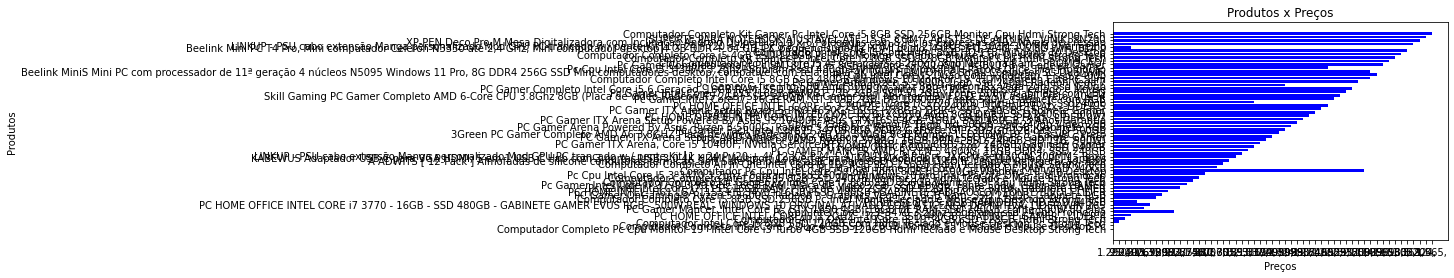

In [114]:
plt.barh(x, y, facecolor='blue')
plt.title('Produtos x Preços')
plt.ylabel('Produtos')
plt.xlabel('Preços')
plt.savefig('grafico.jpg', dpi=200)
plt.show()

PDF!!

In [ ]:
pdf = FPDF('p', 'mm', 'A4')
pdf.add_page()
pdf.set_font('Arial','', 16)

/usr/local/lib/python3.7/dist-packages/fpdf/fpdf.py:1969: UserWarning: Substituting font arial by core font helvetica
  f"Substituting font {family} by core font "


In [121]:
pdf.cell(w=0, h=0, txt='GRÁFICO DESAFIO')
pdf.image(name='grafico.jpg', x=0, y=50, w=200)
pdf.output('PDFdesafio.pdf')

FPDFException: ignored